In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import h5py

sns.set(style="white", font_scale=2.0)

In [2]:
fast5_400_dir = "/path/to/data/MinION_sequencing_data_20190830/08_30_19_run_01/08_30_19_run_01/20190830_1724_MN25769_FAL00869_19be88e4/fast5"

In [3]:
d = fast5_400_dir
signal_lens = []
for f5_fname in os.listdir(d):
    with h5py.File(os.path.join(d, f5_fname), "r") as f5:
        for grp_name, grp in f5.items():
            l = grp.get("Raw/Signal").len()
            signal_lens.append(l)
signal_lens_400 = signal_lens[:]

In [4]:
fast5_1600_dir = "/path/to/data/MinION_sequencing_data_20200114/01_14_20_run_01/01_14_20_run_01/20200114_2008_MN25769_FAL22194_6441bab5/fast5"

In [5]:
d = fast5_1600_dir
signal_lens = []
for f5_fname in os.listdir(d):
    with h5py.File(os.path.join(d, f5_fname), "r") as f5:
        for grp_name, grp in f5.items():
            l = grp.get("Raw/Signal").len()
            signal_lens.append(l)
signal_lens_1600 = signal_lens[:]

In [6]:
min_len = 0
max_len = 25000

In [7]:
signal_400 = np.array([x for x in signal_lens_400 if x < max_len and x > min_len])
signal_1600 = np.array([x for x in signal_lens_1600 if x < max_len and x > min_len])

signal_400_s = np.array([x / 4000. for x in signal_lens_400 if x < max_len and x > min_len])
signal_1600_s = np.array([x / 4000. for x in signal_lens_1600 if x < max_len and x > min_len])

Cell below: Finding best accuracy

In [8]:

ts = range(min_len, max_len, 100)

frac_wrong_400 = []
frac_wrong_1600 = []

filt_400 = np.array([x for x in signal_400 if x > min_len and x < max_len])
filt_1600 = np.array([x for x in signal_1600 if x > min_len and x < max_len])

best_mean = 0
best_t = 0
for t in ts:
    wrong_400 = len(np.where(filt_400 > t)[0])
    wrong_1600 = len(np.where(filt_1600 < t)[0])
    f_400 = wrong_400 / len(filt_400)
    f_1600 = wrong_1600 / len(filt_1600)
    mean_acc = 1-np.mean([f_400, f_1600])
#     if np.abs(f_400 - f_1600) < 0.015 or (t > 10000 and t < 12000):
#         print(f"{t}, {1-f_400:0.4f}, {1-f_1600:0.4f}, {mean_acc:0.4f}")
    if mean_acc > best_mean:
        best_mean = mean_acc
        best_t = t
        print(f"{t}, {1-f_400:0.4f}, {1-f_1600:0.4f}, {mean_acc:0.4f}")
    frac_wrong_400.append(f_400)
    frac_wrong_1600.append(f_1600)

0, 0.0000, 1.0000, 0.5000
2000, 0.0000, 1.0000, 0.5000
2100, 0.0001, 1.0000, 0.5000
2200, 0.0002, 0.9999, 0.5000
2300, 0.0006, 0.9996, 0.5001
2400, 0.0011, 0.9990, 0.5001
4300, 0.0354, 0.9657, 0.5005
4400, 0.0428, 0.9639, 0.5034
4500, 0.0528, 0.9621, 0.5075
4600, 0.0663, 0.9603, 0.5133
4700, 0.0831, 0.9583, 0.5207
4800, 0.1047, 0.9565, 0.5306
4900, 0.1319, 0.9545, 0.5432
5000, 0.1633, 0.9525, 0.5579
5100, 0.2000, 0.9504, 0.5752
5200, 0.2400, 0.9482, 0.5941
5300, 0.2829, 0.9461, 0.6145
5400, 0.3288, 0.9438, 0.6363
5500, 0.3758, 0.9415, 0.6586
5600, 0.4231, 0.9393, 0.6812
5700, 0.4695, 0.9368, 0.7031
5800, 0.5141, 0.9344, 0.7242
5900, 0.5567, 0.9319, 0.7443
6000, 0.5970, 0.9292, 0.7631
6100, 0.6345, 0.9266, 0.7805
6200, 0.6691, 0.9237, 0.7964
6300, 0.7017, 0.9209, 0.8113
6400, 0.7312, 0.9179, 0.8246
6500, 0.7579, 0.9148, 0.8363
6600, 0.7813, 0.9117, 0.8465
6700, 0.8028, 0.9084, 0.8556
6800, 0.8222, 0.9053, 0.8638
6900, 0.8392, 0.9021, 0.8707
7000, 0.8547, 0.8990, 0.8768
7100, 0.8678, 0.8

In [9]:
best_t, best_mean

(9800, 0.9108187512873077)

In [10]:
median_400 = np.median(signal_400)
median_1600 = np.median(signal_1600)
print(f"{median_400}")
print(f"{median_1600}")

5768.0
16968.0


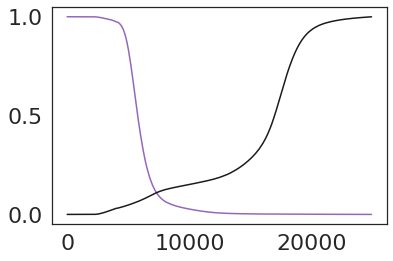

In [11]:
plt.plot(ts, frac_wrong_400, c="tab:purple")
plt.plot(ts, frac_wrong_1600, c="k")

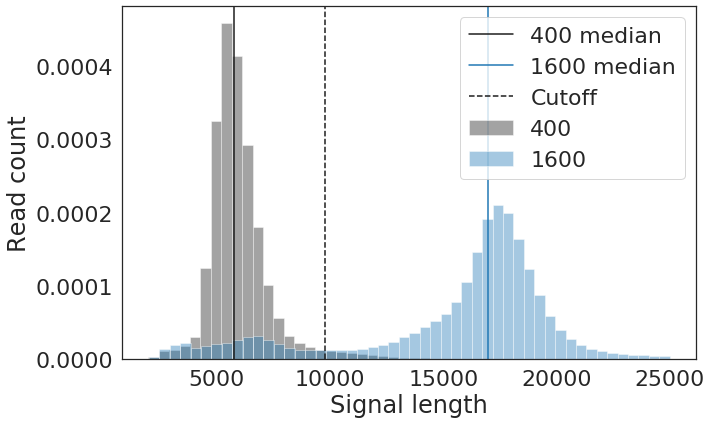

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
c_400 = "k"
c_1600 = "tab:blue"
sns.distplot(signal_400, color=c_400, label="400", kde=False, norm_hist=True)
sns.distplot(signal_1600, color=c_1600, label="1600", kde=False, norm_hist=True)
ax.axvline(median_400, c=c_400, label="400 median")
ax.axvline(median_1600, c=c_1600, label="1600 median")
ax.axvline(best_t, c="k", linestyle="--", label="Cutoff")
# ax.axvline(6000, c="k", linestyle="--")
ax.legend()
ax.set_ylabel("Read count")
ax.set_xlabel("Signal length")
fig.tight_layout()
fig.savefig("length_comparison.svg")
fig.savefig("length_comparison.png", dpi=350)

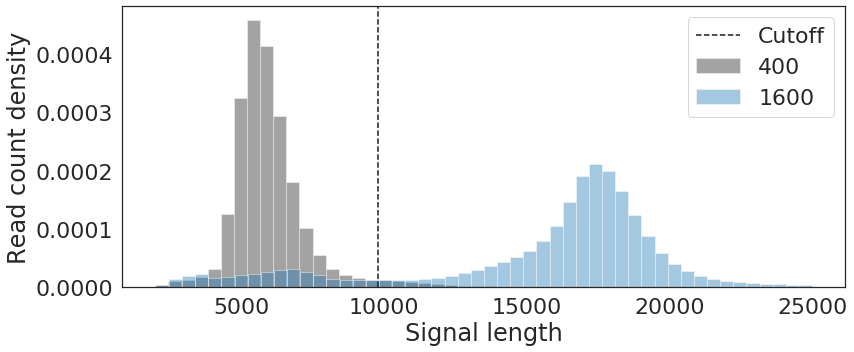

In [21]:
fig, ax = plt.subplots(figsize=(12, 5))
c_400 = "k"
c_1600 = "tab:blue"
sns.distplot(signal_400, color=c_400, label="400", kde=False, norm_hist=True)
sns.distplot(signal_1600, color=c_1600, label="1600", kde=False, norm_hist=True)
# ax.axvline(median_400, c=c_400, label="400 median")
# ax.axvline(median_1600, c=c_1600, label="1600 median")
ax.axvline(best_t, c="k", linestyle="--", label="Cutoff")
# ax.axvline(6000, c="k", linestyle="--")
# ax.set_xlim([0, ax.get_xlim()[1]])
ax.legend()
ax.set_ylabel("Read count density")
ax.set_xlabel("Signal length")
fig.tight_layout()
fig.savefig("length_comparison_nomedian.svg")
fig.savefig("length_comparison_nomedian.png", dpi=350)

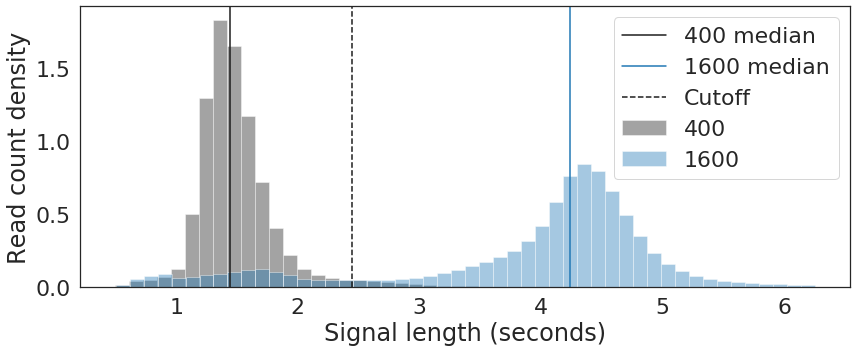

In [20]:
fig, ax = plt.subplots(figsize=(12, 5))
c_400 = "k"
c_1600 = "tab:blue"
sns.distplot(signal_400_s, color=c_400, label="400", kde=False, norm_hist=True)
sns.distplot(signal_1600_s, color=c_1600, label="1600", kde=False, norm_hist=True)
ax.axvline(median_400 / 4000, c=c_400, label="400 median")
ax.axvline(median_1600 / 4000, c=c_1600, label="1600 median")
ax.axvline(best_t / 4000, c="k", linestyle="--", label="Cutoff")
# ax.axvline(6000. / 4000, c="k", linestyle="--")
ax.legend()
ax.set_ylabel("Read count density")
ax.set_xlabel("Signal length (seconds)")
fig.tight_layout()
fig.savefig("length_comparison_sec.svg")
fig.savefig("length_comparison_sec.png", dpi=350)

In [18]:
print(f"Best t in seconds: {best_t / 4000: 0.2f}")
print(f"6k obs in seconds: {6000 / 4000: 0.2f}")

Best t in seconds:  2.45
6k obs in seconds:  1.50
